###### Environment initialization

In [18]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [ ]:
print(tf.version)

###### Dataset loading

In [37]:
df_train = pd.read_csv('train.csv')
df_eval  = pd.read_csv('eval.csv')

###### Retreive survived values

In [38]:
print('\n\nTRAIN DATA')
df_train.head(5)



TRAIN DATA


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [39]:
print('\n\nTEST DATA')
df_eval.head(5)



TEST DATA


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [41]:
y_train = df_train.pop('survived')
y_eval  = df_eval.pop('survived')

In [42]:
df_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<AxesSubplot:>

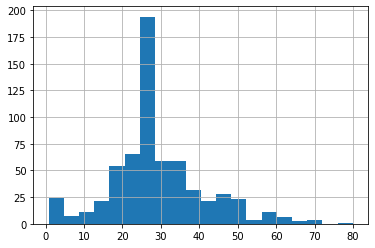

In [44]:
df_train.age.hist(bins=20)

<AxesSubplot:>

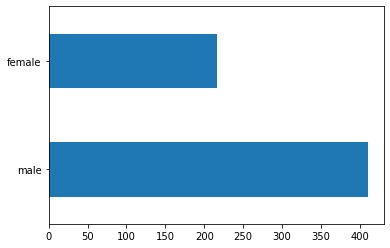

In [46]:
df_train.sex.value_counts().plot(kind="barh")

<AxesSubplot:>

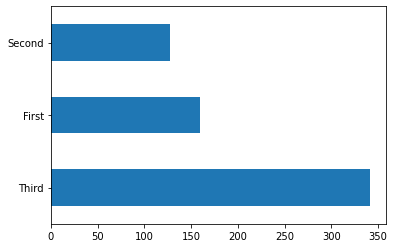

In [49]:
df_train['class'].value_counts().plot(kind="barh")

Text(0.5, 0, '% survived')

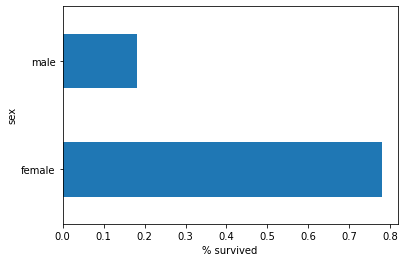

In [60]:
pd.concat([df_train, y_train], axis=1).groupby('sex').survived.mean().plot(kind="barh").set_xlabel('% survived')